# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/Users/liuwenyang/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [3]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path,delimiter = ',')
print('row {} column {}'.format(news_raw.shape[0],news_raw.shape[1]))
news_raw.describe()

row 2129 column 521


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) ***Your answer goes here:***

over 75% data points are in range 1 to 10, however the max data points for each attribute have very large value and the value of std is also large. There maybe some large value data point in these dataset and they may be outliers.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [5]:
# (1) # Your Code goes here:

#there are 521 attributes, so I display first 20 attributes

for i in range(20):
    print(news_raw.columns.values[i])


w1_aaa
w2_pins
w3_kmr
w4_notion
w5_queens
w6_dwyer
w7_defenseman
w8_gld
w9_tocchet
w10_home
w11_buying
w12_internet
w13_slots
w14_compatible
w15_transfer
w16_baltimore
w17_mean
w18_person
w19_performance
w20_support


(2) ***Your answer goes here:***

news_raw.columns.values is the name list of attributes, and I use loop to print the first 20 values of list(first 20 attributes)




### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

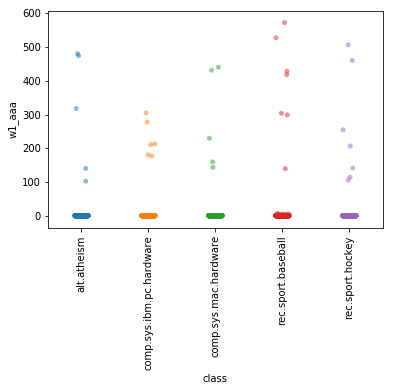

In [10]:
# (1) # Your Code goes here:
plt.figure()
plt.subplot(111)
ax = sns.stripplot(x="class", y="w1_aaa", data=news_raw, jitter=True, alpha = 0.5)
labels = ["alt.atheism", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "rec.sport.baseball", "rec.sport.hockey"]
ax.set_xticklabels(labels, rotation=90)
plt.show()

(2) ***Your answer goes here:***

For each category, most of the data is concentrated in the vicinity of 1, with a small amount of data above 100, less than 600.


### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

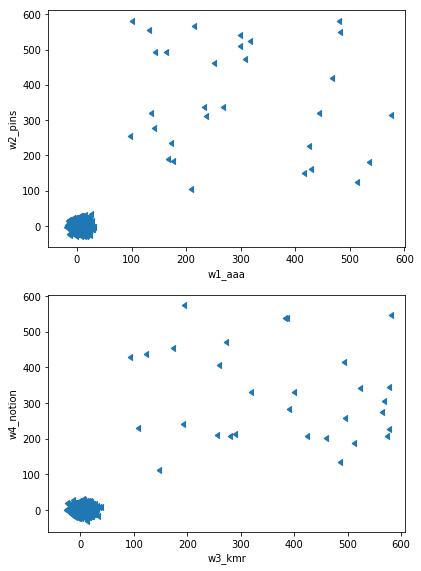

In [11]:
# (1) # Your Code goes here:
list = []

for i in range(4):
    singleFeatureData = np.array(news_raw[news_raw.columns[i]])
    list.append(singleFeatureData)

plt.figure(figsize=(6.4,9.6))
plt.subplot(211)

scatter_jitter(list[0],list[1])

plt.xlabel(news_raw.columns[0])
plt.ylabel(news_raw.columns[1])


plt.subplot(212)

scatter_jitter(list[2],list[3])
plt.xlabel(news_raw.columns[2])
plt.ylabel(news_raw.columns[3])


plt.show()


(2) ***Your answer goes here:***
################################### to do
reduce

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***

Under the assumption of normal distribution, the region mean +- 3*std contains 99.7% of the data. If the mean value of a certain distance distribution exceeds +- 3*std, then this value can be simply marked as outlier.

So,for each column,
1，calculate the mean and the std
2，find the data point out of the range and mark it as -1(easy to process later)
3, filter the data point > 0,then the return dataframe will contain "nan" value
4，drop the rows which contain the "nan" value



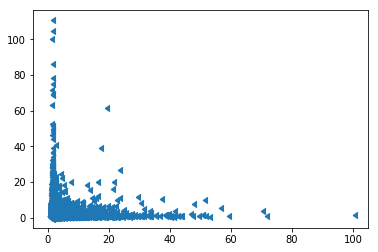

the shape of new_clean is (2094, 521)
the outliers number is 35


In [18]:
# (2) # Your Code goes here:

#not alter the original data
news_preClean = news_raw.copy()

#mark the row which is with outliers for 1.6
outliers = {}

#loop the columns
for column in news_preClean.columns:
    #exclude the 'class' column
    if column == 'class':
        break
    
    #calculate the mean and std
    columnMean = news_preClean[column].mean()
    columnStd = news_preClean[column].std()
    colomnFrame = news_preClean[column]
    
    #loop the rows
    for i in range(len(news_preClean[column])):
        
        #value for row
        value = news_preClean[column].iloc[i]
        
        #judge the value if meets the range
        if (value < columnMean - 3 * columnStd) or (value > columnMean + 3 * columnStd):
            
            #marked as -1
            news_preClean[column].iloc[i] = -1
            outliers[i] = 1

#get a new dataframe which '-1' change to 'np.nan'
news_preClean_withNan = news_preClean[news_preClean > 0]

#drop the row with value 'np.nan'
news_clean = news_preClean_withNan.dropna(axis=0, how='any')


#visualise all the data points with scatter_jitter
#the fisrt half part of data points is in firstHalfDataList
#the other half part of data points is in secondHalfDataList

firstHalfDataList = []
secondHalfDataList = []

#loop the colums exclude 'class'
for i in range(len(news_clean.columns) - 1):
    singleFeatureData = []
    
    #add the date point in a list
    for value in news_clean[news_clean.columns[i]]:
        singleFeatureData.append(value)
    #if the column is in the first half, extend the dataList to firstHalfDataList
    if i < (len(news_clean.columns) - 1) / 2:
        firstHalfDataList.extend(singleFeatureData)
    else:
        secondHalfDataList.extend(singleFeatureData)

#visualise
plt.figure()
plt.subplot(1,1,1)
scatter_jitter(firstHalfDataList,secondHalfDataList)
plt.show()

print('the shape of new_clean is {}'.format(news_clean.shape))

print('the outliers number is {}'.format(news_raw.shape[0] - news_clean.shape[0]))


(3) ***Your answer goes here:***

number of points in the cleaned dataset is 2094

the number rejected as outliers is 35


# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

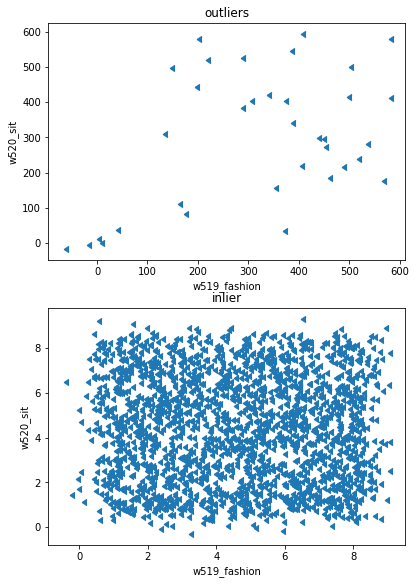

In [21]:
# (1) # Your Code goes here:

#make the figure more bigger
plt.figure(figsize=(6.4,9.6))

#Visualise the outlier
plt.subplot(211)

#outliers is a list marked the row which is with outliers in 1.5
indexList = []

for key in outliers.keys():
    indexList.append(key)   
outDataFrame = news_raw.iloc[indexList,:]
plt.title('outliers')
scatter_jitter(outDataFrame['w519_fashion'],outDataFrame['w520_sit'])
plt.xlabel('w519_fashion')
plt.ylabel('w520_sit')


#Visualise the inlier ones
plt.subplot(212)
plt.title('inlier')
scatter_jitter(news_clean['w519_fashion'],news_clean['w520_sit'])
plt.xlabel('w519_fashion')
plt.ylabel('w520_sit')


plt.show()

(2) ***Your answer goes here:***
Yes, I believe that it is appropriate to do such cleaning on the entire data-set. Because after testing with test data, the model will be adjust. So outliers will effect 

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [23]:
# (1) # Your Code goes here:

#If you use the print command, the information will not be displayed in the form of a table, 
#so I used two lines to display

data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path,delimiter=',')


news_train.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


In [24]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path,delimiter=',')
news_test.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
conditional independence

In [ ]:
(2/2) ***Your answer goes here:***

#Because we can not calculate the joint probabilty, 
#so the training data of correlated attribute will lead to inaccuracy of the model

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

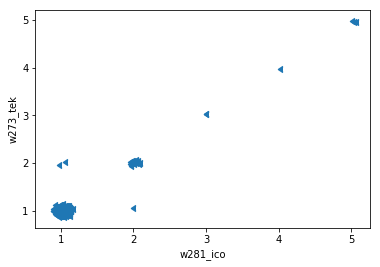

In [25]:
# (1) # Your Code goes here:
plt.figure()
plt.subplot(111)
scatter_jitter(news_train['w281_ico'],news_train['w273_tek'])
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
plt.show()





(2) ***Your answer goes here:***
these features have linear correlation.
It is hard to say, because although these feature have linear correlation, they also meet the conditional independence.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***
the simplest classiffier is always choose the class with the highest probability.
for example,if a bunch of apples, the good chance is 60%, the bad chance is 40%, think of apple as good is the  simplest classiffier.

In [34]:
# (2) # Your Code goes here:

#groupby the count of class
countFrame = news_train.groupby("class").count()


print(countFrame.iloc[:,0].max())
print(sum(countFrame.iloc[:,0]))

#use the maximum of class / total counts
basline = countFrame.iloc[:,0].max() / sum(countFrame.iloc[:,0])

print("train data baseline",basline)

447
2099
train data baseline 0.21295855169128156


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [39]:
# (1) # Your Code goes here:
X = news_train.drop('class',axis=1)
y = news_train['class']
gnb = GaussianNB()
gnb.fit(X=X,y=y)

GaussianNB(priors=None)

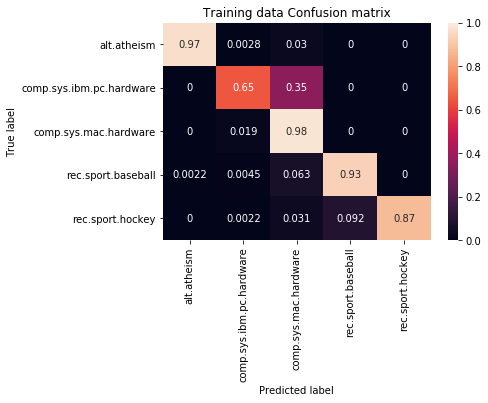

accuracy 0.8780371605526441


In [40]:
# (2) # Your Code goes here:
tr_pred = gnb.predict(X=X)
ca = accuracy_score(y, tr_pred)
cm = confusion_matrix(y, tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plt.subplot(1,1,1)
labels = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']
sns.heatmap(cm_norm, xticklabels=labels, yticklabels=labels, vmin=0.0, vmax=1.0, annot=True)
plt.title('Training data Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('accuracy',ca)

(3) ***Your answer goes here:***

Because the accuracy is over 0.87, I think it is a reasonable metric to use for this dataset.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***
1,the average of accuracy of the confusion matrix is approximately to the accuracy of the previous question about 0.88.
2,This model will be incorrectly classified into mac articles when classifying pc articles. Because these two article  are very closely related to each other.

I think it is a reasonable metric to use for this dataset.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

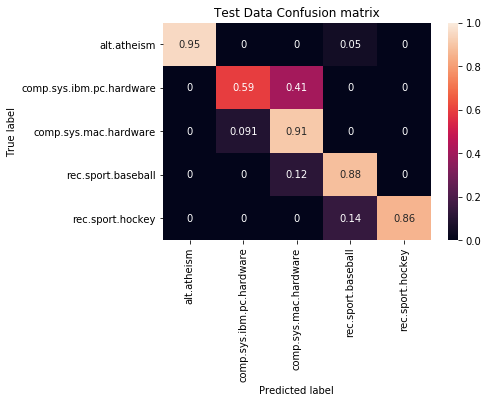

In [32]:
# (1) # Your Code goes here:

testX = news_test.drop('class',axis=1)

testy = news_test['class']

testy_pred = tr_pred = gnb.predict(X=testX)

ca = accuracy_score(testy, tr_pred)

cm = confusion_matrix(testy, tr_pred)

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()

plt.subplot(1,1,1)

sns.heatmap(cm_norm, xticklabels=labels, yticklabels=labels, vmin=0., vmax=1., annot=True)

plt.title('Test Data Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [35]:
# (2) # Your Code goes here:
trainFrame = news_train.groupby("class").count()

column = trainFrame.iloc[:,0]

maxIndex = column[column == column.max()].index.values[0]

testFrame = news_test.groupby("class").count()

testMax = testFrame.iloc[4,0]

testBaseLine = testMax / sum(testFrame.iloc[:,0])

print("test data baseline",testBaseLine)

test data baseline 0.21875


(3) ***Your answer goes here:***
1, the performance of confusion matrix on the test data is very close with that on trainning data. because the training data is similiar with the test data(Question 2.1)
2, this baseline is also very close that of training data.
3, as I mentioned in Question 2.6, it is hard to predict pc.hardware articles because they are related with mac.hardware, and Hockey's article will be incorrectly predicted as a basketball because they are all sports, with a small amount of similarity.
4, because the articles of alt.atheism have no connnetion of the other four type, the performance level of those is high.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

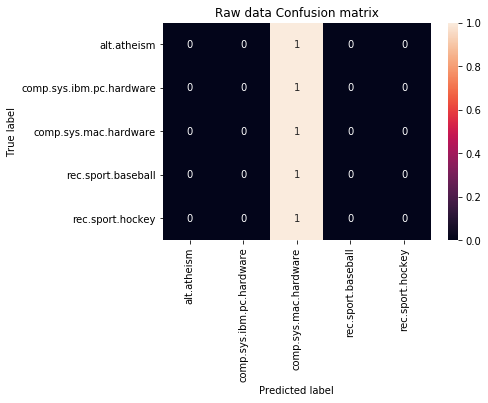

In [41]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raws = pd.read_csv(data_path,delimiter=',')

X = news_raws.drop('class',axis=1)

y = news_raws['class']

testX = news_test.drop('class',axis=1)

testy = news_test['class']

gnb = GaussianNB()

gnb.fit(X=X,y=y)

tr_pred = gnb.predict(X=testX)

cm = confusion_matrix(testy, tr_pred)

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()

plt.subplot(1,1,1)

labels = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']

sns.heatmap(cm_norm, xticklabels=labels, yticklabels=labels, vmin=0., vmax=1., annot=True)

plt.title('Raw data Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

(2) ***Your answer goes here:***
Because outliers let the data deviate from the normal distribution and Gaussians Naive Bayes can not train model correctly.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

Because Gaussians request the data of a attribute to follow a normal distribution.
I think Multinomial Naive Bayes model can employ this kind of data